In [1]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [98]:
df = pd.read_csv("Bitcoin Historical Data - Investing.com (1).csv",sep=(';'),na_values = ["-"])
df

,Date,Price,Open,High,Low,Vol.,Change,Vol
0,Dec172022,16678.9,16629.0,16764.0,16587.0,220.78,0.0030,220780
1,Dec162022,16629.6,17356.7,17518.5,16542.4,303.56,-0.0419,303560
2,Dec152022,17356.1,17796.4,17846.1,17298.2,263.44,-0.0247,263440
3,Dec142022,17796.4,17778.6,18351.8,17682.1,318.98,0.0010,318980
4,Dec132022,17778.6,17210.9,17951.6,17094.5,328.71,0.0330,328710
...,...,...,...,...,...,...,...,...
1457,Dec212018,3850.9,4075.2,4153.1,3786.9,748.76,-0.0552,748760
1458,Dec202018,4076.0,3687.2,4140.3,3665.8,958.58,0.1055,958580
1459,Dec192018,3687.1,3668.1,3924.7,3647.5,792.40,0.0052,792400
1460,Dec182018,3668.0,3526.0,3683.1,3456.9,698.53,0.0402,698530


In [99]:
df=df.fillna(0)

In [100]:
import datetime

 
dt_ref = datetime.datetime.combine(datetime.date(year=2022, month=12, day=17), datetime.time(hour=0, minute=0, second=0))
Time =[]
for i in range(1462):
    
    Time.append(dt_ref)
    dt_ref += datetime.timedelta(hours=-24)
Time

[datetime.datetime(2022, 12, 17, 0, 0),
 datetime.datetime(2022, 12, 16, 0, 0),
 datetime.datetime(2022, 12, 15, 0, 0),
 datetime.datetime(2022, 12, 14, 0, 0),
 datetime.datetime(2022, 12, 13, 0, 0),
 datetime.datetime(2022, 12, 12, 0, 0),
 datetime.datetime(2022, 12, 11, 0, 0),
 datetime.datetime(2022, 12, 10, 0, 0),
 datetime.datetime(2022, 12, 9, 0, 0),
 datetime.datetime(2022, 12, 8, 0, 0),
 datetime.datetime(2022, 12, 7, 0, 0),
 datetime.datetime(2022, 12, 6, 0, 0),
 datetime.datetime(2022, 12, 5, 0, 0),
 datetime.datetime(2022, 12, 4, 0, 0),
 datetime.datetime(2022, 12, 3, 0, 0),
 datetime.datetime(2022, 12, 2, 0, 0),
 datetime.datetime(2022, 12, 1, 0, 0),
 datetime.datetime(2022, 11, 30, 0, 0),
 datetime.datetime(2022, 11, 29, 0, 0),
 datetime.datetime(2022, 11, 28, 0, 0),
 datetime.datetime(2022, 11, 27, 0, 0),
 datetime.datetime(2022, 11, 26, 0, 0),
 datetime.datetime(2022, 11, 25, 0, 0),
 datetime.datetime(2022, 11, 24, 0, 0),
 datetime.datetime(2022, 11, 23, 0, 0),
 datetime

In [101]:
dt = pd.DataFrame({'datetime':Time})


In [102]:
frames = [ dt,df]
  
data_coin = pd.concat(frames, axis=1, join='inner')
data_coin

,datetime,Date,Price,Open,High,Low,Vol.,Change,Vol
0,2022-12-17,Dec172022,16678.9,16629.0,16764.0,16587.0,220.78,0.0030,220780
1,2022-12-16,Dec162022,16629.6,17356.7,17518.5,16542.4,303.56,-0.0419,303560
2,2022-12-15,Dec152022,17356.1,17796.4,17846.1,17298.2,263.44,-0.0247,263440
3,2022-12-14,Dec142022,17796.4,17778.6,18351.8,17682.1,318.98,0.0010,318980
4,2022-12-13,Dec132022,17778.6,17210.9,17951.6,17094.5,328.71,0.0330,328710
...,...,...,...,...,...,...,...,...,...
1457,2018-12-21,Dec212018,3850.9,4075.2,4153.1,3786.9,748.76,-0.0552,748760
1458,2018-12-20,Dec202018,4076.0,3687.2,4140.3,3665.8,958.58,0.1055,958580
1459,2018-12-19,Dec192018,3687.1,3668.1,3924.7,3647.5,792.40,0.0052,792400
1460,2018-12-18,Dec182018,3668.0,3526.0,3683.1,3456.9,698.53,0.0402,698530


In [103]:
data_coin.drop(['Date','Vol.'], inplace=True, axis=1)
data_coin

,datetime,Price,Open,High,Low,Change,Vol
0,2022-12-17,16678.9,16629.0,16764.0,16587.0,0.0030,220780
1,2022-12-16,16629.6,17356.7,17518.5,16542.4,-0.0419,303560
2,2022-12-15,17356.1,17796.4,17846.1,17298.2,-0.0247,263440
3,2022-12-14,17796.4,17778.6,18351.8,17682.1,0.0010,318980
4,2022-12-13,17778.6,17210.9,17951.6,17094.5,0.0330,328710
...,...,...,...,...,...,...,...
1457,2018-12-21,3850.9,4075.2,4153.1,3786.9,-0.0552,748760
1458,2018-12-20,4076.0,3687.2,4140.3,3665.8,0.1055,958580
1459,2018-12-19,3687.1,3668.1,3924.7,3647.5,0.0052,792400
1460,2018-12-18,3668.0,3526.0,3683.1,3456.9,0.0402,698530


In [104]:
data_coin.to_csv('data_coin.csv', index=False)

In [88]:
df = pd.read_csv("data_coin.csv",header=0, index_col=0, parse_dates=True, squeeze=True)
df

C:\Users\Imad\AppData\Local\Temp\ipykernel_27304\1888556075.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv("data_coin.csv",header=0, index_col=0, parse_dates=True, squeeze=True)


,Price,Open,High,Low,Change,Vol
datetime,,,,,,
2022-12-17,16678.9,16629.0,16764.0,16587.0,0.0030,220780
2022-12-16,16629.6,17356.7,17518.5,16542.4,-0.0419,303560
2022-12-15,17356.1,17796.4,17846.1,17298.2,-0.0247,263440
2022-12-14,17796.4,17778.6,18351.8,17682.1,0.0010,318980
2022-12-13,17778.6,17210.9,17951.6,17094.5,0.0330,328710
...,...,...,...,...,...,...
2018-12-21,3850.9,4075.2,4153.1,3786.9,-0.0552,748760
2018-12-20,4076.0,3687.2,4140.3,3665.8,0.1055,958580
2018-12-19,3687.1,3668.1,3924.7,3647.5,0.0052,792400


In [89]:
df = df.iloc[::-1]
print(df)

              Price     Open     High      Low  Change     Vol
datetime                                                      
2018-12-17   3526.1   3248.3   3597.4   3243.1  0.0857  534780
2018-12-18   3668.0   3526.0   3683.1   3456.9  0.0402  698530
2018-12-19   3687.1   3668.1   3924.7   3647.5  0.0052  792400
2018-12-20   4076.0   3687.2   4140.3   3665.8  0.1055  958580
2018-12-21   3850.9   4075.2   4153.1   3786.9 -0.0552  748760
...             ...      ...      ...      ...     ...     ...
2022-12-13  17778.6  17210.9  17951.6  17094.5  0.0330  328710
2022-12-14  17796.4  17778.6  18351.8  17682.1  0.0010  318980
2022-12-15  17356.1  17796.4  17846.1  17298.2 -0.0247  263440
2022-12-16  16629.6  17356.7  17518.5  16542.4 -0.0419  303560
2022-12-17  16678.9  16629.0  16764.0  16587.0  0.0030  220780

[1462 rows x 6 columns]


In [90]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
 
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [91]:
values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df.shape[1]+1, 2*df.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t)
1,0.002002,0.000000,0.002678,0.000000,0.814985,0.000120,0.004215
2,0.004215,0.004320,0.003985,0.003389,0.737327,0.000156,0.004513
3,0.004513,0.006531,0.007670,0.006410,0.677590,0.000177,0.010577
4,0.010577,0.006828,0.010958,0.006700,0.848780,0.000214,0.007067
5,0.007067,0.012864,0.011153,0.008619,0.574501,0.000167,0.008837


In [92]:
values = reframed.values

In [93]:
n_train_time = 1200

In [111]:

train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [95]:
model = Sequential()
model.add(LSTM(300, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [96]:
history = model.fit(train_x, train_y, epochs=50, batch_size=1200, validation_data=(test_x, test_y), verbose=2, shuffle=False)


Epoch 1/50
1/1 - 2s - loss: 0.1917 - val_loss: 0.1122 - 2s/epoch - 2s/step
Epoch 2/50
1/1 - 0s - loss: 0.1751 - val_loss: 0.0995 - 70ms/epoch - 70ms/step
Epoch 3/50
1/1 - 0s - loss: 0.1594 - val_loss: 0.0875 - 59ms/epoch - 59ms/step
Epoch 4/50
1/1 - 0s - loss: 0.1443 - val_loss: 0.0764 - 74ms/epoch - 74ms/step
Epoch 5/50
1/1 - 0s - loss: 0.1306 - val_loss: 0.0661 - 61ms/epoch - 61ms/step
Epoch 6/50
1/1 - 0s - loss: 0.1173 - val_loss: 0.0566 - 66ms/epoch - 66ms/step
Epoch 7/50
1/1 - 0s - loss: 0.1054 - val_loss: 0.0480 - 62ms/epoch - 62ms/step
Epoch 8/50
1/1 - 0s - loss: 0.0939 - val_loss: 0.0401 - 72ms/epoch - 72ms/step
Epoch 9/50
1/1 - 0s - loss: 0.0835 - val_loss: 0.0330 - 63ms/epoch - 63ms/step
Epoch 10/50
1/1 - 0s - loss: 0.0735 - val_loss: 0.0267 - 63ms/epoch - 63ms/step
Epoch 11/50
1/1 - 0s - loss: 0.0650 - val_loss: 0.0212 - 65ms/epoch - 65ms/step
Epoch 12/50
1/1 - 0s - loss: 0.0570 - val_loss: 0.0165 - 79ms/epoch - 79ms/step
Epoch 13/50
1/1 - 0s - loss: 0.0501 - val_loss: 0.012

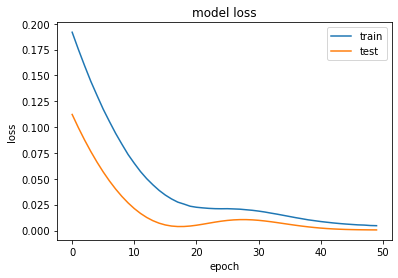

In [97]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [98]:
size = df.shape[1]

# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat_calls = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat_calls = scaler.inverse_transform(inv_yhat_calls)
inv_yhat_calls = inv_yhat_calls[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat_calls))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1540.218


In [99]:
inv_y

array([46297. , 45811. , 46407. , 46629. , 45506. , 43173. , 43448. ,
       42275. , 42767. , 42138. , 39497. , 40078. , 41133. , 39936. ,
       40560. , 40382. , 39703. , 40803. , 41503. , 41368. , 40482. ,
       39709. , 39418. , 39464. , 40427. , 38113. , 39243. , 39748. ,
       38581. , 37650. , 38461. , 38514. , 37718. , 39688. , 36544. ,
       36009. , 35468. , 34060. , 30095. , 31007.5, 29068.2, 28976. ,
       29284.4, 30080.4, 31308.7, 29849. , 30437.5, 28683.7, 30305.9,
       29178.6, 29434.6, 30286.6, 29093.3, 29648.7, 29540.6, 29203.5,
       28601.2, 29027.1, 29465.2, 31723.3, 31793.4, 29798.5, 30455.5,
       29700.9, 29864.3, 29913. , 31367.6, 31128.8, 30201.6, 30097.8,
       29083.3, 28403.4, 26606.3, 22448. , 22157.3, 22577.9, 20386.6,
       20444.6, 18986.5, 20577.2, 20572.3, 20720.4, 19965.8, 21100.7,
       21226.9, 21489.9, 21043.5, 20730.2, 20278. , 20111.3, 19926.6,
       19262.9, 19243.2, 19309.9, 20215.8, 20200.6, 20561.1, 21637.8,
       21611.2, 2158

In [100]:
rmse = np.sqrt(mean_squared_error(pred, inv_yhat_calls))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1657.291


In [101]:
inv_y

array([46297. , 45811. , 46407. , 46629. , 45506. , 43173. , 43448. ,
       42275. , 42767. , 42138. , 39497. , 40078. , 41133. , 39936. ,
       40560. , 40382. , 39703. , 40803. , 41503. , 41368. , 40482. ,
       39709. , 39418. , 39464. , 40427. , 38113. , 39243. , 39748. ,
       38581. , 37650. , 38461. , 38514. , 37718. , 39688. , 36544. ,
       36009. , 35468. , 34060. , 30095. , 31007.5, 29068.2, 28976. ,
       29284.4, 30080.4, 31308.7, 29849. , 30437.5, 28683.7, 30305.9,
       29178.6, 29434.6, 30286.6, 29093.3, 29648.7, 29540.6, 29203.5,
       28601.2, 29027.1, 29465.2, 31723.3, 31793.4, 29798.5, 30455.5,
       29700.9, 29864.3, 29913. , 31367.6, 31128.8, 30201.6, 30097.8,
       29083.3, 28403.4, 26606.3, 22448. , 22157.3, 22577.9, 20386.6,
       20444.6, 18986.5, 20577.2, 20572.3, 20720.4, 19965.8, 21100.7,
       21226.9, 21489.9, 21043.5, 20730.2, 20278. , 20111.3, 19926.6,
       19262.9, 19243.2, 19309.9, 20215.8, 20200.6, 20561.1, 21637.8,
       21611.2, 2158

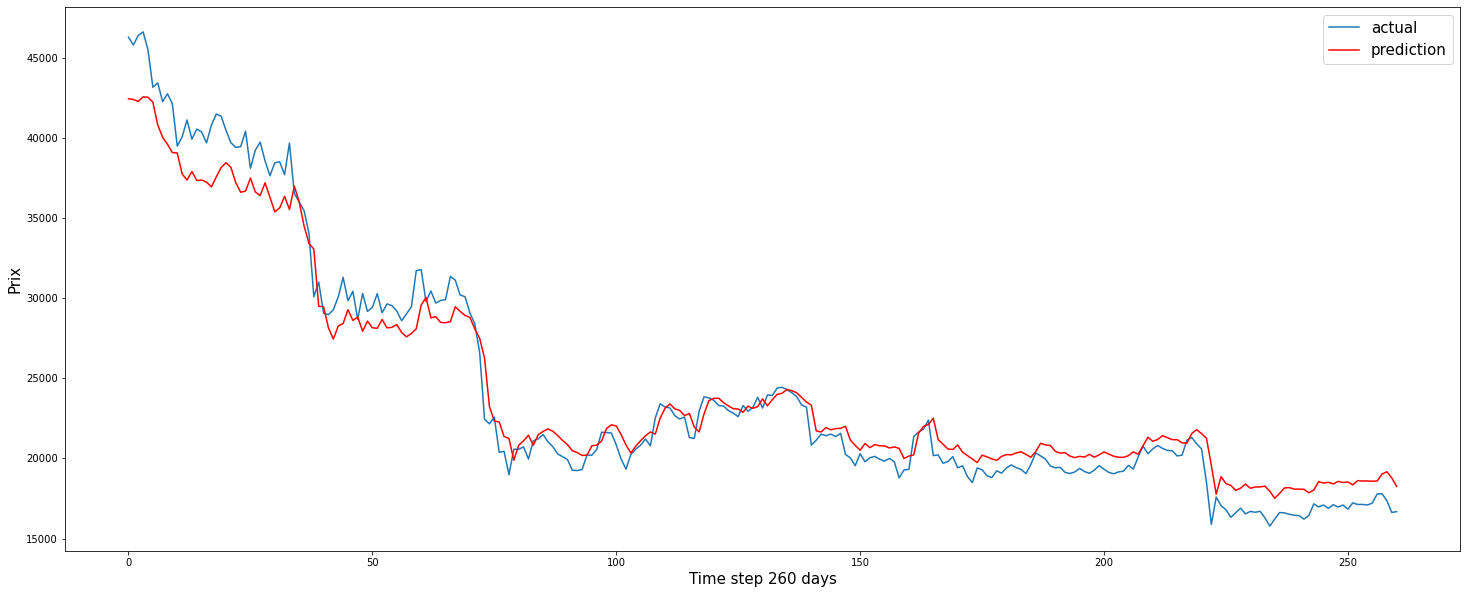

In [102]:
import matplotlib.pyplot as plt
aa=[x for x in range(261)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y, label="actual")
plt.plot(aa, inv_yhat_calls, 'r', label="prediction")
plt.ylabel('Prix', size=15)
plt.xlabel('Time step 260 days', size=15)
plt.legend(fontsize=15)
plt.show()

In [104]:
model.save('./model')

INFO:tensorflow:Assets written to: ./model\assets


INFO:tensorflow:Assets written to: ./model\assets


In [105]:
from tensorflow import keras

In [108]:
model = keras.models.load_model("./model")

In [112]:
y=model.predict(test_x)

In [113]:
y

array([[0.60907286],
       [0.60833144],
       [0.60649097],
       [0.61090475],
       [0.6105009 ],
       [0.6057252 ],
       [0.5836    ],
       [0.571492  ],
       [0.5647323 ],
       [0.5565943 ],
       [0.556237  ],
       [0.5359526 ],
       [0.52985173],
       [0.53824776],
       [0.5295071 ],
       [0.52992266],
       [0.52780944],
       [0.5232398 ],
       [0.53292835],
       [0.5421027 ],
       [0.54683185],
       [0.5421899 ],
       [0.52725416],
       [0.51804096],
       [0.5191856 ],
       [0.53180534],
       [0.518379  ],
       [0.51476985],
       [0.5272278 ],
       [0.5132354 ],
       [0.49895304],
       [0.5027685 ],
       [0.514064  ],
       [0.50126475],
       [0.52399486],
       [0.50863177],
       [0.4851517 ],
       [0.46812898],
       [0.46265703],
       [0.4070058 ],
       [0.40657407],
       [0.38595396],
       [0.37509435],
       [0.3878038 ],
       [0.39023668],
       [0.40371048],
       [0.39325988],
       [0.396